In [40]:
#-------------------------------------------------------------------
# Author Wessel Olaf van Dam 09-30-2019
#
# Machine Learning script on practice dataset "cleveland_Heart_Disease.csv"
#-------------------------------------------------------------------

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
import sklearn

# We use the Cleveland Heart Disease dataset that has already been preprocessed, 13 features and 1 target variable
data = pd.read_csv('cleveland_Heart_Disease.csv')
data.head()

data = data.dropna()

# following are the 13 features used to classify heart disease or no -------

# age: age in years 
# sex: sex (1 = male; 0 = female) 
# cp: chest pain type (1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic) 
# trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
# chol: serum cholestoral in mg/dl 
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
#restecg: resting electrocardiographic results (0=normal,1=having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
#2= showing probable or definite left ventricular hypertrophy by Estes' criteria 
# thalach: maximum heart rate achieved 
# exang: exercise induced angina (1 = yes; 0 = no) 
# oldpeak = ST depression induced by exercise relative to rest 
# slope: the slope of the peak exercise ST segment (1=upsloping, 2=flat,3=downsloping) 
# ca: number of major vessels (0-3) colored by flourosopy 
# thal: 3=normal; 6=fixed defect; 7=reversable defect 

#The Variable to be classified

#num: diagnosis of heart disease (angiographic disease status) 0: < 50% diameter narrowing, 1: > 50% diameter narrowing 
#(in any major vessel: attributes 59 through 68 are vessels)

#here we recode the num variable to 0 for healthy and > 0 for heart disease
data.loc[data.num != 0, 'num'] = 'heart disease'
data.loc[data.num == 0, 'num'] = 'healthy'

# shape
print(data.shape)
print(data.describe())
print(data.groupby('num').size())


(297, 14)
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914

In [36]:
#apply SelectKBest class to extract top 10 best features based on Univariate Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:13]
y = data.iloc[:,-1]

print ("Univariate selection")
print ("\n")
bestfeatures = SelectKBest(score_func=chi2, k=13)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  #print features top to bottom

# Based on the SelectKBest algorithm the thalach,ca,oldpeak,thal,exang,age,chol,trestbps,cp are
# the best features

Univariate selection


       Specs       Score
7    thalach  187.053104
11        ca   82.730613
9    oldpeak   68.570533
12      thal   65.221093
8      exang   35.508090
0        age   22.917697
4       chol   20.855084
3   trestbps   16.707463
2         cp   14.591587
6    restecg    8.134652
10     slope    7.828836
1        sex    7.444195
5        fbs    0.002547


In [42]:
# cleaning up the dataframe by selecting the 9 features that are the best and the target-variable
data = data[['thalach','ca','oldpeak', 'thal','exang','age','chol','trestbps','cp','num']]
data


,thalach,ca,oldpeak,thal,exang,age,chol,trestbps,cp,num
0,150,0.0,2.3,6.0,0,63,233,145,1,healthy
1,108,3.0,1.5,3.0,1,67,286,160,4,heart disease
2,129,2.0,2.6,7.0,1,67,229,120,4,heart disease
3,187,0.0,3.5,3.0,0,37,250,130,3,healthy
4,172,0.0,1.4,3.0,0,41,204,130,2,healthy
5,178,0.0,0.8,3.0,0,56,236,120,2,healthy
6,160,2.0,3.6,3.0,0,62,268,140,4,heart disease
7,163,0.0,0.6,3.0,1,57,354,120,4,healthy
8,147,1.0,1.4,7.0,0,63,254,130,4,heart disease
9,155,0.0,3.1,7.0,1,53,203,140,4,heart disease


In [52]:
#importing relevant libraries
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#We will split the loaded dataset into two, 80% of which we will use to train our models 
#and 20% that we will hold back as a validation dataset. X_train and Y_train contain the
#training data, and X_validation and Y_validation will be used later to test the performance
#of our models

# Split-out validation dataset
array = data.values
X = array[:,0:9]
Y = array[:,9]

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print (X_train.shape) # we have 297 observations altogether, now 80% is X training = 237
print (X_validation.shape) # 20% of 297 = 60 X validation points

(237, 9)
(60, 9)


LR: 0.839674 (0.061718)
LDA: 0.843659 (0.065424)
KNN: 0.645652 (0.076826)
CART: 0.780435 (0.046898)
NB: 0.839674 (0.076762)
SVM: 0.544746 (0.085272)


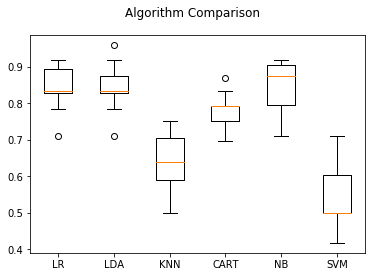

In [50]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []

# Here we print the accuracy of each of the 6 models to see
# which one is most accurate

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# We can see that the Gaussian Naive Bayes is the best algorithm with an accuracy of 84.0%   

# plotting the results
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [46]:
#The NB algorithm is very simple and was an accurate model based on our tests. 
#Now we want to get an idea of the accuracy of the model on our validation set.

#We can run the NB model directly on the validation set and summarize the results as a final accuracy score, 
#a confusion matrix and a classification report.

# Make predictions on validation dataset
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

# We can see that the accuracy is 0.833 or 83.3%. The confusion matrix provides 
# an indication of the 10 errors made. 28/32 healthy subjects are correctly classified
# 22/28 heart disease patients are correctly classified.

# Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and 
# support showing excellent results (granted the validation dataset was small).


0.8333333333333334
[[28  4]
 [ 6 22]]
               precision    recall  f1-score   support

      healthy       0.82      0.88      0.85        32
heart disease       0.85      0.79      0.81        28

    micro avg       0.83      0.83      0.83        60
    macro avg       0.83      0.83      0.83        60
 weighted avg       0.83      0.83      0.83        60

